<a href="https://colab.research.google.com/github/Wasim-Zaman/deep_learning_with_tensorflow/blob/main/Neural_Network_Classification_With_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Binary Classification**

# Creating Data to view and fit

Since we have no real life dataset yet, but as a rehelsal, it is good practice to work on the toy dataset before moving to the actual dataset

In [ ]:
import tensorflow as tf
#inporting already available dataset for the purpose of practicing 
from sklearn.datasets import make_circles

# The dataset has already divided the data into x and y from the scikit-learn side
X, y = make_circles(n_samples = 1000, noise=0.03, random_state = 42)

In [ ]:
X, y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

# Visualizing the data

Since we can see that the data in this formate is not clear, in order to clearly understand the data, we should visualize it

In [ ]:
# Creating data frame off the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.DataFrame({'X1': X[:,0], 'X2': X[:,1], 'Labels': y})
dataset.head()

,X1,X2,Labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


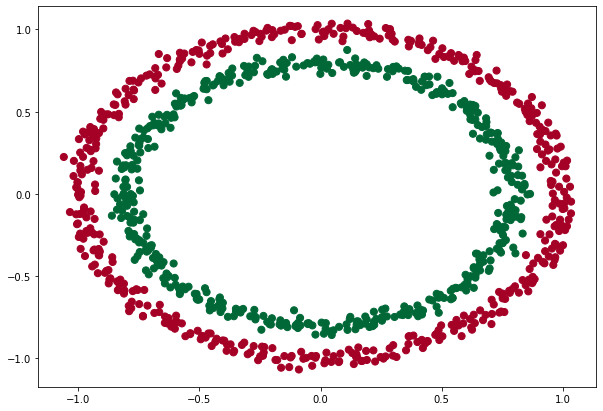

In [ ]:
# To make data more clearly visible, let's take a step farther in visualization
plt.figure(figsize = (10, 7))
plt.scatter(X[:,0], X[:,1], s=50, c=y, cmap=plt.cm.RdYlGn)

# Inputs and output shape

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

# Steps in modeling

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 2ms/step - loss: 2.8544 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7131 - accuracy: 0.5430
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.5090
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6950 - accuracy: 0.5010
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.4830


In [ ]:
# Evaluating the model
model_1.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5090


[0.6934750080108643, 0.5090000033378601]

It seems like the model is guessing, the accuracy of the model is only 50 percent, which just like if it is guessing one value as 0 and one value as 1.

Let's try to fit it on more number of epochs

In [ ]:
model_1.fit(X, y, epochs=200)

NameError: ignored

In [ ]:
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

It is still 50 percent, let's now try with adding more hidden layers and fit the model on more numbers of epochs.

In [ ]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model2.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics= ['accuracy']
)

model2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.8044 - accuracy: 0.5090
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7235 - accuracy: 0.5030
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7145 - accuracy: 0.4950
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7078 - accuracy: 0.5010
Epoch 5/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7037 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7008 - accuracy: 0.4960
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.7001 - accuracy: 0.4990
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4980
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6973 - accuracy: 0.4960
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6962 - accuracy: 0.4920
Epoch 11/

In [ ]:
model2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6933 - accuracy: 0.5000


[0.6933314800262451, 0.5]

We cannot imagine, it is still 50 percent..... how about making the network wider (adding more neurons to the network)

In [ ]:
# Creating model 3
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['accuracy']
)

model3.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 1.0162 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6972 - accuracy: 0.5010
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7019 - accuracy: 0.4750
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6979 - accuracy: 0.4940
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.5030
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6963 - accuracy: 0.5240
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6992 - accuracy: 0.4930
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 0.6970 - accuracy: 0.5160
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6991 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6964 - accuracy: 0.4680
Epoch 11/

In [ ]:
model3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6989 - accuracy: 0.5000


[0.6989450454711914, 0.5]

Oh my gosh still 50 percent.....
🔑 Note: Whenever your model is performing strangely or there's something going on with your data you're not quite sure of, remember these three words: visualize, visualize, visualize. Inspect your data, inspect your model, inpsect your model's predictions.

In [ ]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing binary classifcation...


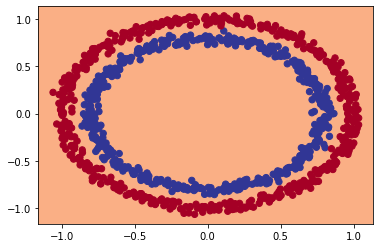

In [ ]:
plot_decision_boundary(model3, X, y)

In [ ]:
# let's now create the same model (as model 3) but here let's change the optimization function from SGD to adam
model3.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model3.fit(X, y, epochs=100, verbose=0)

In [ ]:
model3.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5110


[0.6935921907424927, 0.5109999775886536]

doing binary classifcation...


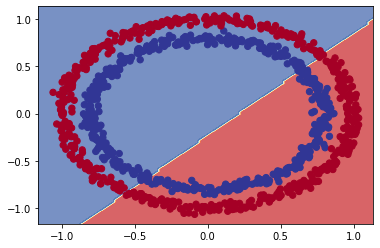

In [ ]:
plot_decision_boundary(model3, X, y)

doing binary classifcation...


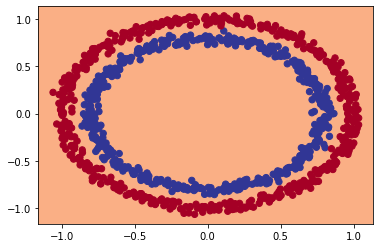

In [ ]:
plot_decision_boundary(model2, X, y)

# What is wrong with the model
It looks like our model is linearly separable which means that linearity in our model is the main issue.
In fact our model is linearly separable, so it might work perfectly for the regression problem, let's **Try** creating linear model off the model

In [ ]:
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

In [ ]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 4ms/step - loss: 248.2155 - mae: 248.2155
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 138.9005 - mae: 138.9005
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 53.1039 - mae: 53.1039
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 73.5170 - mae: 73.5170
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 71.2358 - mae: 71.2358
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 47.0040 - mae: 47.0040
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 45.9386 - mae: 45.9386
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 42.3638 - mae: 42.3638
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 43.6831 - mae: 43.6831
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 42.6198 - mae: 42.6198
Epoch 11/100
5/5 [==============================] - 0s 

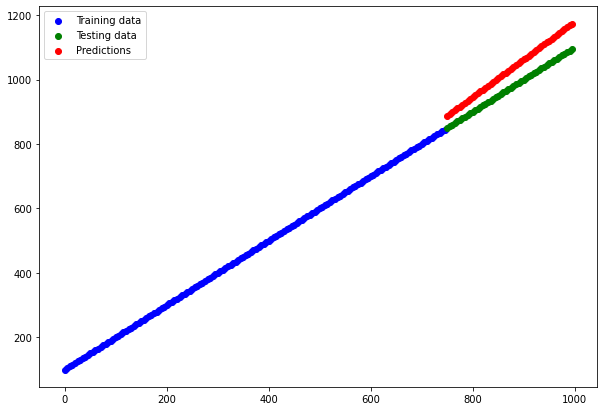

In [ ]:
y_reg_preds = model3.predict(X_reg_test)

plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

# The main issue is Non-Linearity

Let's play in the tensorflow playground website and create same model we create there

In [ ]:
tf.random.set_seed(42)

model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear),
    tf.keras.layers.Dense(1)
])

model4.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

model4.fit(X, y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 4.2380 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0223 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 3.8296 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 3.7654 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 3.6464 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 1ms/step - loss: 3.4960 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 1ms/step - loss: 3.3804 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.2279 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 1ms/step - loss: 2.7024 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 2.4002 - accuracy: 0.5000
Epoch 11/100
32/32 [=

doing binary classifcation...


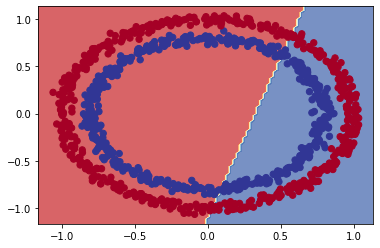

In [ ]:
plot_decision_boundary(model4, X, y)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history6 = model6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/

doing binary classifcation...


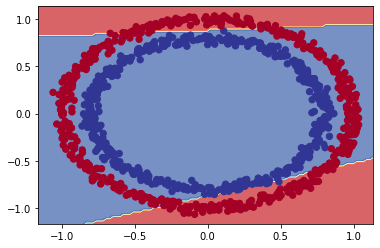

In [ ]:
plot_decision_boundary(model6, X, y)

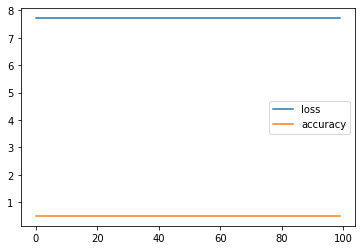

In [ ]:
pd.DataFrame(history6.history).plot()

# Fixing the issue

In [ ]:
tf.random.set_seed(42)

model7=tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model7.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=0.001),
    metrics=['accuracy']
)

history7 = model7.fit(X, y, epochs=100, verbose=1)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/100
32/32 [=

doing binary classifcation...


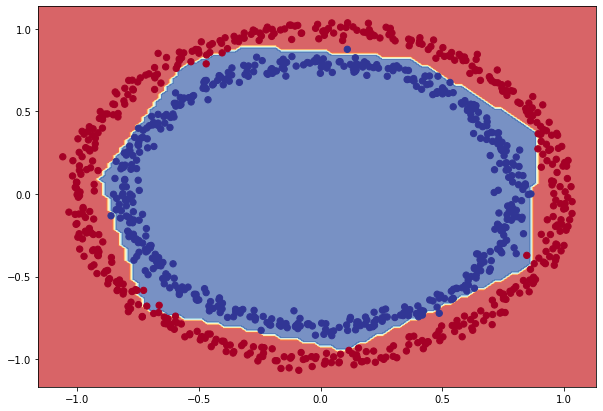

In [ ]:
plt.figure(figsize=(10, 7))
plot_decision_boundary(model7, X, y)

# Evaluating and Improving classification model

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.

In [ ]:
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

In [ ]:
# Creating a model that would be trained on train data and evaluate on test data
tf.random.set_seed(42)

model8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model8.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=0.01),
    metrics = ['accuracy']
)

history8 = model8.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/

In [ ]:
model8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0245 - accuracy: 0.9950


[0.02450874261558056, 0.9950000047683716]

In [ ]:
y_pred8 = model8.predict(X_test)
y_pred8

array([[9.97149944e-01],
       [9.99974668e-01],
       [9.95097399e-01],
       [9.92870212e-01],
       [1.10337138e-03],
       [1.02036131e-04],
       [9.92025793e-01],
       [2.66373158e-04],
       [9.99822617e-01],
       [1.40917003e-02],
       [9.99893785e-01],
       [4.42608893e-02],
       [9.99072433e-01],
       [9.57705498e-01],
       [9.99875009e-01],
       [9.97350931e-01],
       [9.98184323e-01],
       [8.44971478e-01],
       [2.15291977e-04],
       [9.94295359e-01],
       [5.07664372e-05],
       [9.75114524e-01],
       [9.91799474e-01],
       [9.93335843e-01],
       [7.58548049e-05],
       [9.55371976e-01],
       [9.90346670e-01],
       [1.61395669e-02],
       [1.05991356e-04],
       [9.98090327e-01],
       [6.19505154e-05],
       [9.99338627e-01],
       [9.94201064e-01],
       [1.01533115e-04],
       [3.72439623e-03],
       [9.99699712e-01],
       [9.96620774e-01],
       [9.90817428e-01],
       [9.99996960e-01],
       [9.98137236e-01],


doing binary classifcation...


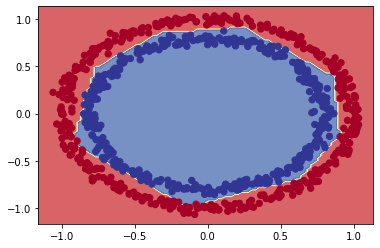

In [ ]:
plot_decision_boundary(model8, X_train, y_train)

doing binary classifcation...
doing binary classifcation...


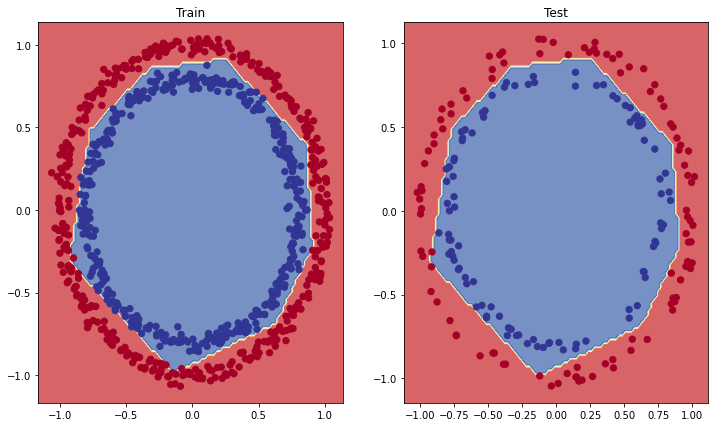

In [ ]:
# Comparing test decision boundaries and train decision boundaries
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model8, X_test, y_test)

In [ ]:
# set random seed
tf.random.set_seed(42)

# create a model
model10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model10.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history10 = model10.fit(X_train, y_train, epochs=100, callbacks=schedular)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

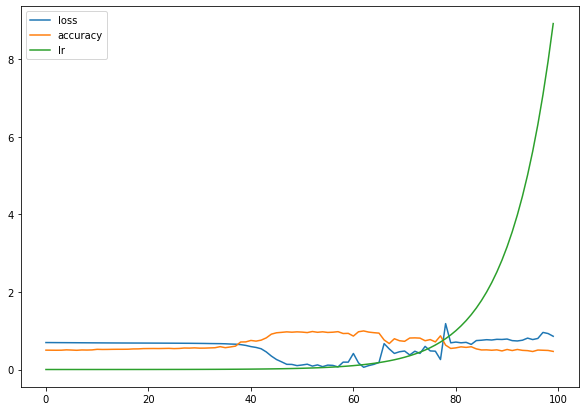

In [ ]:
pd.DataFrame(history10.history).plot(figsize=(10,7))

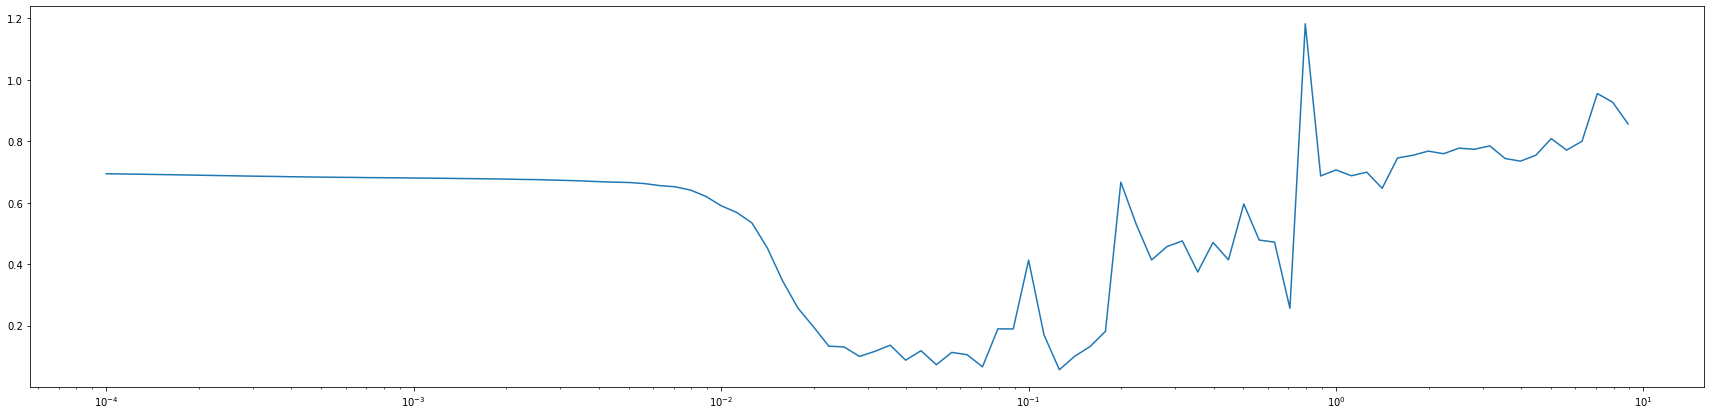

In [ ]:
# let's plot lr vs loss
lrs = history10.history['lr']
loss = history10.history['loss']

plt.figure(figsize=(30, 7))
plt.semilogx(lrs, loss)

We will check the lowest point on the curver and pick ten times less value for the learning rate, in this case we can see that we should pick 10^-2 which is equavalent to 0.01

In [ ]:
10**-2

0.01

In [ ]:
from scipy import optimize
# Creating model 10 again with ideal learning rate

# set random seed
tf.random.set_seed(42)

# create model 11 (same as 10)
model11 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model11.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(lr=10**-2),
    metrics = ['accuracy']
)

history11 = model11.fit(X_train, y_train, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


25/25 [==============================] - 1s 2ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/200
25/25 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/200
25/25 [=

In [ ]:
model11.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0449 - accuracy: 0.9850


[0.04493652656674385, 0.9850000143051147]

# Creating and Ploting Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix
y_preds = model11.predict(X_test)

# creating a confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))

In [ ]:
# cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
# cm

In [ ]:
def plot_confusion_matrix(y_test, y_pred, cm, color='Greens'):
  import seaborn as sns
  import matplotlib.pyplot as plt
  
  plt.figure(figsize=(10, 10))
  sns.heatmap(data=cm, cmap=color, annot=True, xticklabels=[0,1], yticklabels=[0,1])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.show()
  

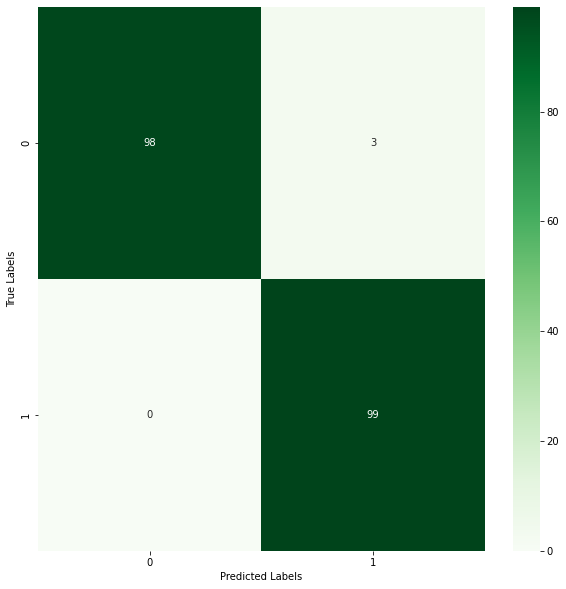

In [ ]:
plot_confusion_matrix(y_test, y_preds, cm=cm)

# Working with larger example (Multiclass classification)




When you have more than two classes as an option, it is called **multiclass classification**

* This means that if you have 3 different classes, it is called multiclass classification
* It also means that if you have 100 different classes, it is also multiclass classification.

to practice multiclass classification, we are goig to build a neural network, to classify images of different items of clothing.

for that we are using the built in dataset from tensorflow side, which is called fashion_mnist


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# importing all the data inside the fashion_mnist
'''
Sinse the data is already sorted into train and test data, so we can also use 
tuples to fetch the already present data
'''

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


# Checking the shape of the data and labels

In [ ]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

# Checking the value of the data we have

In [ ]:
train_data[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

# Ploting the Images.....

03329545809
In order to pllt images we need to import the matplotlib library.


Text(0.5, 1.0, '8')

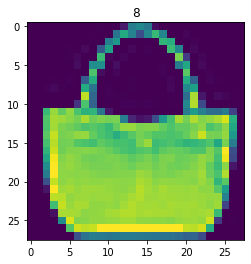

In [ ]:
import matplotlib.pyplot as plt
index_number = 100
plt.imshow(train_data[index_number])
plt.title(train_labels[index_number])

We can see that the labels are not in human readable form, for that what we do is we give names to each of the 10 different labels we have.

(-0.5, 27.5, 27.5, -0.5)

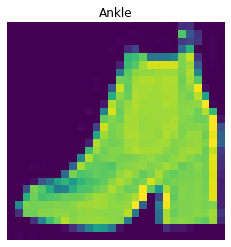

In [ ]:
label_names = 'T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker Bag Ankle boot'.split()

index_number = 800

plt.imshow(train_data[index_number])
plt.title(label_names[train_labels[index_number]])
plt.axis(False)

Instead of ploting one by one image, why don't we create a function which will randomly create 4 images alog with its label name

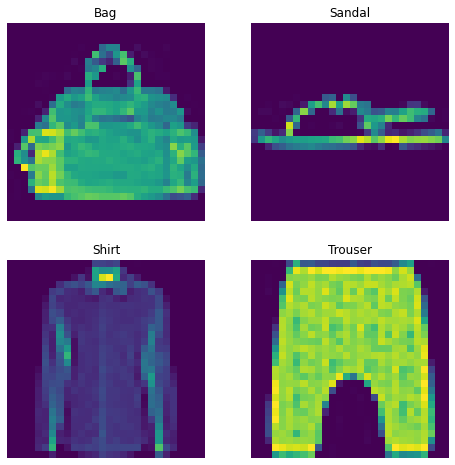

In [ ]:
def plot_random_images(train_data = train_data, train_labels = train_labels, label_names = label_names):
  import random
  import matplotlib.pyplot as plt

  plt.figure(figsize=(8, 8))

  for m in range(4):
    random_index = random.choice(range(len(train_data)))
    axes = plt.subplot(2, 2, m+1)
    plt.imshow(train_data[random_index])
    plt.title(label_names[train_labels[random_index]])
    plt.axis(False)

plot_random_images(train_data, train_labels)

Now as we have plotted the images and converted the labels into human readable form, it is time to create a model.....

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

# create a model
model11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax),
])


model11.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy'],
)

non_norm_history = model11.fit(
    train_data,
    train_labels,
    epochs=10,
    validation_data=(test_data, test_labels)
)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

# **Working with multi-class classification**

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Preparing the data 
### Loading the data from the dataset
#### showing, visualizing and ploting the data

the fashion_mnist module has already separated the data into train and test sets. we just need to get it

In [3]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Checking the input and output shapes

In [4]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
# Visualizing the data
train_data[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

In [6]:
# Visualizing the actual labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

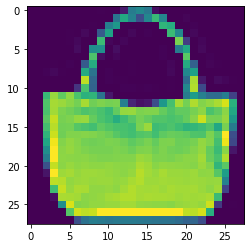

In [7]:
# Ploting the data

import matplotlib.pyplot as plt

plt.imshow(train_data[100])

Text(0.5, 1.0, 'Bag')

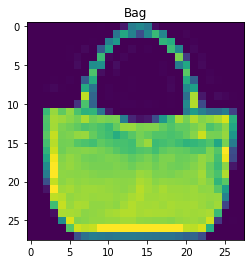

In [8]:
# Making labels human readable
list_of_products = 'T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker	Bag	Ankle boot'.split()

index = 100
plt.imshow(train_data[index])
plt.title(list_of_products[train_labels[index]])

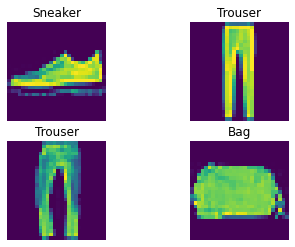

In [9]:
# ploting four random pictures with labels
import matplotlib.pyplot as plt
import random

list_of_products = 'T-shirt/top Trouser Pullover Dress Coat Sandal Shirt Sneaker	Bag	Ankle boot'.split()
for m in range(4):
  random_index = random.choice(range(len(train_data)))

  plt.subplot(2,2,m+1)
  plt.imshow(train_data[random_index])
  plt.title(list_of_products[train_labels[random_index]])
  plt.axis(False)

## Building a multiclass classification model for the given data and labels

In [10]:
# set random seed
tf.random.set_seed(42)

# creating a model
model11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# Compiling the model,,
model11.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

# Fitting the model..
non_norm_history = model11.fit(train_data,
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 2.1627 - accuracy: 0.1629 - val_loss: 1.7874 - val_accuracy: 0.2104
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7033 - accuracy: 0.2535 - val_loss: 1.6427 - val_accuracy: 0.2812
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6271 - accuracy: 0.2836 - val_loss: 1.6482 - val_accuracy: 0.2998
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.6038 - accuracy: 0.2894 - val_loss: 1.5994 - val_accuracy: 0.2955
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5967 - accuracy: 0.2955 - val_loss: 1.5777 - val_accuracy: 0.3137
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5882 - accuracy: 0.3018 - val_loss: 1.5767 - val_accuracy: 0.3054
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5809 - accuracy: 0.3118 - val_loss: 1.5741 - val_accuracy

In [11]:
# checking the summay of the model
model11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


Fine.....
Our mdoel is accurate by 63 percent on trian and 60 percent on the validation data, after the 40 number of epochs, this accuracy is far better than guessing.
But do you remeber we talked about the normalization....

let's tweak our model on normalization because the neural network not only work with numerical data but also with scaled data

## Evaluating the model with scaled features..

In [12]:
train_data.max(), test_data.min()

(255, 0)

It means that our data ranges between 0 - 255, but we need to scale it between 0-1

In [13]:
# Normalizing the data
# train_data_norm = train_data / train_data.max()
# test_data_norm = test_data / test_data.max()

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [14]:
train_data_norm[:10]

array([[[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ]],

       [[0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        ,
         0.        , 0.        ],
        [0. 

In [15]:
test_data_norm[:10]

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

## Creating a model on normalized data

In [16]:
# set the random seed
tf.random.set_seed(42)

# creating a model
model12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),

])

# compiling the model
model12.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

# Fitting the model
norm_history = model12.fit(train_data_norm,
            train_labels,
            epochs=10,
            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

In [17]:
model12.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 3140      
                                                                 
 dense_4 (Dense)             (None, 4)                 20        
                                                                 
 dense_5 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


We can see that only by tweaking one thing, the accuracy has increased by good level.

## Ploting data loss curves (for both normalized and non normalized data)

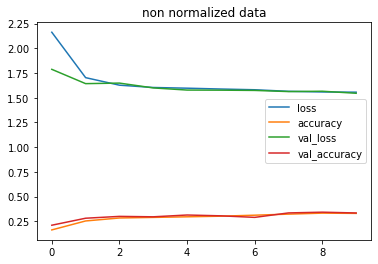

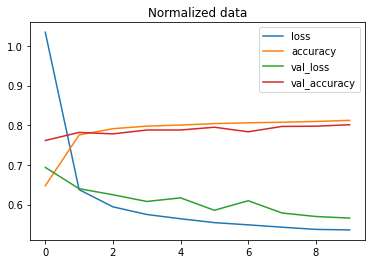

In [18]:
import pandas as pd

# lost curve for non_normalized train_data
pd.DataFrame(non_norm_history.history).plot(title='non normalized data')
# lost curve for normalized train_data
pd.DataFrame(norm_history.history).plot(title='Normalized data')

## Finding the Ideal learning rate for our model 


In [19]:
# set random seed
tf.random.set_seed(42)

# creating a model
model13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

# compiling the model
model13.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy'],
)

# creating learning schedule
learning_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fitting the model
norm_history13 = model13.fit(train_data_norm,
                             train_labels,
                             epochs=40,
                             validation_data=(test_data_norm, test_labels),
                             callbacks=[learning_schedular]
                             )

Epoch 1/40
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 4s

## Ploting the learning rate decay curve

Text(0.5, 1.0, 'Learning rate Vs Loss For ideal learninig rate')

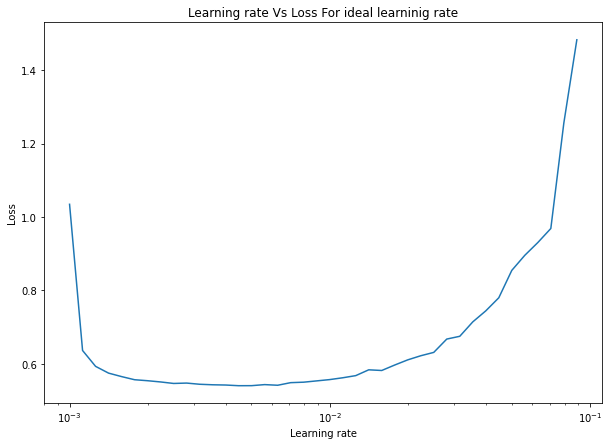

In [20]:
# history
hist = norm_history13.history


# learning rate
lr = hist['lr']

# loss
loss = hist['loss']


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
plt.semilogx(lr, loss)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate Vs Loss For ideal learninig rate')

From the above graph, we can see that the loss is instantly deacreasing at the start but as the learing rate increases gradually, the loss start to increase again.....

For that let us choose the learning rate for which the loss is the minimum...
We know the crieteria for choosing the learninig rate, we have to go slightly backward from the minimum position in the graph, let's take the learning rate value = 10**-3

In [21]:
# set the random seed
tf.random.set_seed(42)

# creating a model
model14 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# compile the model
model14.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(lr=10**-3),
    metrics=['accuracy'],
)

# fit the model
history14 = model14.fit(
    train_data_norm,
    train_labels,
    epochs=20,
    validation_data=(test_data_norm, test_labels)
)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: 0.7836
Epo

## Evaluating the model

Evaluation means testing the model aganst predictions..
Checking how the model is predicting against the data (Trained data)

In deep learning we evaluate our model using uvaluation method and also using some evaluation metrices we have.

One of the evaluation metrices is confusio metrix...

**Let's** first evaluate our model using evaluate method and then try to make a confusion metrix to see how our model is actually predicitng.

In [22]:
# Evlauating model 14 using evaluate method
model14.evaluate(test_data_norm)

313/313 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [23]:
# checking the summary of the model
model14.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


## Checking the prediction probability of the model.

**let's** now test how our model guesses about the input features and how it predicts about the multi-classes. 

In case of multi-class classification, the model does not directly predicts, rather it checks the probabilities of all the classes.

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a particular class is to be the label.

The higher the number in the prediction probabilities list, the more likely the model believes that is the right class.

to see the highest probability of the class, we use argmax() funciton on the column axis of the input data

In [24]:
y_prob = model14.predict(test_data_norm)

313/313 [==============================] - 1s 1ms/step


In [25]:
y_prob[0]

array([8.5629961e-11, 3.5361622e-13, 2.6633725e-05, 4.6356284e-08,
       5.0949748e-05, 9.6119456e-02, 8.1778026e-08, 9.1868833e-02,
       4.0605268e-03, 8.0787349e-01], dtype=float32)

The above are the probabilities of each classes we have for the predictions, as we said that it predicts the class using highest probability, in order to see the highest probability among the given, we use argmax() method

In [26]:
# checking the class having max probability
y_prob[0].argmax(), list_of_products[y_prob[0].argmax()] 

(9, 'Ankle')

## Converting all the predictions from probabilities to labels

**By the way** we converted the probabilities into the labels so that the humans can understand it easiliy which means that for the sack of human readability becuase farther from that we will create confusion matrix off the labels.

and **Confusion matrix** does not work on the probabilities rather it works on the prediction labels.

In [27]:
y_preds = y_prob.argmax(axis=1)

In [28]:
# printing the first 10 entries
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

## Creating confusion matrix

As we have labels in numeric form rather than in probabilities so It is the time to actually create a confusion matrix off the label predictions.



In [29]:
# creating confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_labels, y_preds)

# printing confusion matrix
print(cm)

[[696   8  25  87   9   5 160   0  10   0]
 [  2 939   2  35   9   0  13   0   0   0]
 [ 19   2 656  10 188   0 110   0  15   0]
 [ 39  10  10 819  55   0  47   1  19   0]
 [  0   0  95  23 800   0  73   0   7   2]
 [  0   0   1   0   0 894   0  60   7  38]
 [106   4 158  57 159   1 499   0  16   0]
 [  0   0   0   0   0  31   0 936   0  33]
 [  4   1  38  15   8  12   9   5 906   2]
 [  0   0   1   0   2  15   0  51   1 930]]


## Converting the values of confusion matrix into percentage

In [30]:
import numpy as np
cm_percent = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] * 100
cm_percent

array([[69.6,  0.8,  2.5,  8.7,  0.9,  0.5, 16. ,  0. ,  1. ,  0. ],
       [ 0.2, 93.9,  0.2,  3.5,  0.9,  0. ,  1.3,  0. ,  0. ,  0. ],
       [ 1.9,  0.2, 65.6,  1. , 18.8,  0. , 11. ,  0. ,  1.5,  0. ],
       [ 3.9,  1. ,  1. , 81.9,  5.5,  0. ,  4.7,  0.1,  1.9,  0. ],
       [ 0. ,  0. ,  9.5,  2.3, 80. ,  0. ,  7.3,  0. ,  0.7,  0.2],
       [ 0. ,  0. ,  0.1,  0. ,  0. , 89.4,  0. ,  6. ,  0.7,  3.8],
       [10.6,  0.4, 15.8,  5.7, 15.9,  0.1, 49.9,  0. ,  1.6,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  3.1,  0. , 93.6,  0. ,  3.3],
       [ 0.4,  0.1,  3.8,  1.5,  0.8,  1.2,  0.9,  0.5, 90.6,  0.2],
       [ 0. ,  0. ,  0.1,  0. ,  0.2,  1.5,  0. ,  5.1,  0.1, 93. ]])

## Finding the total number of classes

to find the number of classes, what we do is to take the confusion matrix and grab the first item off of it.

In [31]:
classes = cm.shape[0]

## Making the confusion matrix prettier

We can see that the above confusion matrix is not easy to read, for the sack of human readability, what we can do is to make a heatmap plot and plot the data

[[<matplotlib.axis.YTick at 0x7f8033765e90>,
 [Text(0, 0.5, 'T-shirt/top'),
  Text(0, 1.5, 'Trouser'),
  Text(0, 2.5, 'Pullover'),
  Text(0, 3.5, 'Dress'),
  Text(0, 4.5, 'Coat'),
  Text(0, 5.5, 'Sandal'),
  Text(0, 6.5, 'Shirt'),
  Text(0, 7.5, 'Sneaker'),
  Text(0, 8.5, 'Bag'),
  Text(0, 9.5, 'Ankle')],
 Text(186.0, 0.5, 'True label'),
 [Text(0.5, 0, 'T-shirt/top'),
  Text(1.5, 0, 'Trouser'),
  Text(2.5, 0, 'Pullover'),
  Text(3.5, 0, 'Dress'),
  Text(4.5, 0, 'Coat'),
  Text(5.5, 0, 'Sandal'),
  Text(6.5, 0, 'Shirt'),
  Text(7.5, 0, 'Sneaker'),
  Text(8.5, 0, 'Bag'),
  Text(9.5, 0, 'Ankle')],
 Text(0.5, 96.0, 'Predicted label'),
 Text(0.5, 1.0, 'Confusion Matrix')]

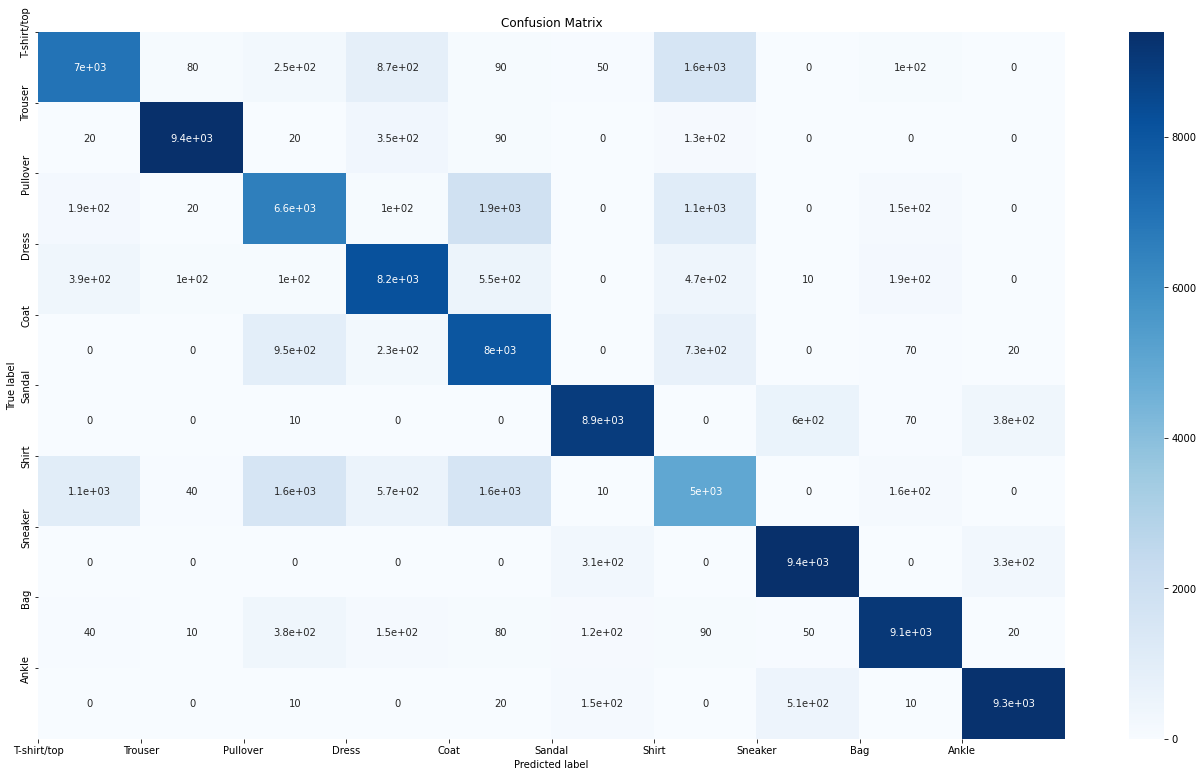

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

n_classes = cm.shape[0]
labels = list_of_products

fig, ax = plt.subplots(figsize=(23, 13))
# making a heatmap plot
sns.heatmap(cm_percent * 100, annot=True, cmap='Blues')
ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)


## Making funtion from prettier confusion matrix

In [33]:
# Making funtion from prettier confusion matrix

def make_confusion_matrix(y_true, y_pred, classes = None, labels = labels, figsize = (23, 13)):
  import matplotlib.pyplot as plt
  import seaborn as sns
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix

  # Creating sklearn confusion matrix
  cm = confusion_matrix(y_true, y_pred)

  # creating normalized cm for percentage
  cm_percentage = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

  # creating figure and axes for ploting
  fig, ax = plt.subplots(figsize=figsize)

  # making a heatmap plot
  sns.heatmap(cm_percentage * 100, annot=True, cmap='Blues')

  # setting up the axes
  ax.set(title="Confusion Matrix",
          xlabel="Predicted label",
          ylabel="True label",
          xticks=np.arange(classes), # create enough axis slots for each class
          yticks=np.arange(classes), 
          xticklabels=labels, # axes will labeled with class names (if they exist) or ints
          yticklabels=labels)


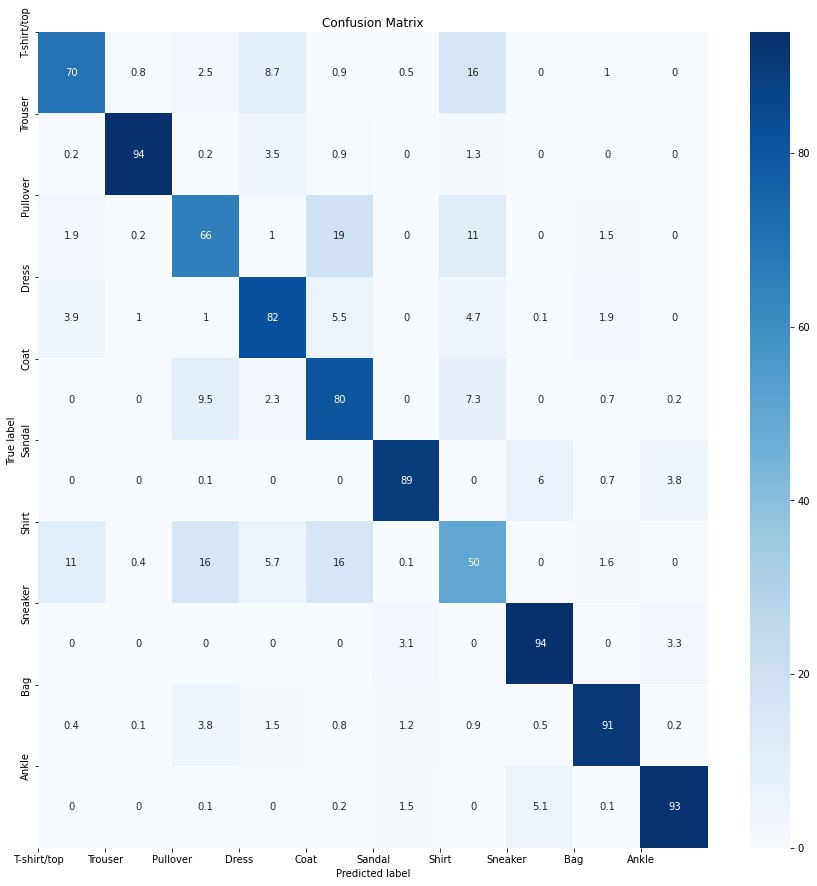

In [34]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes = classes,
                      labels = list_of_products,
                      figsize=(15, 15))

In [35]:
# evaluating the model with classification report
from sklearn.metrics import classification_report

print(classification_report(test_labels, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.70      0.75      1000
           1       0.97      0.94      0.96      1000
           2       0.67      0.66      0.66      1000
           3       0.78      0.82      0.80      1000
           4       0.65      0.80      0.72      1000
           5       0.93      0.89      0.91      1000
           6       0.55      0.50      0.52      1000
           7       0.89      0.94      0.91      1000
           8       0.92      0.91      0.91      1000
           9       0.93      0.93      0.93      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



1/1 [==============================] - 0s 20ms/step
Coat T-shirt/top


Text(0.5, 0, 'the pred_lab = Dress with accuracy = 78.48, and actual label = T-shirt/top')

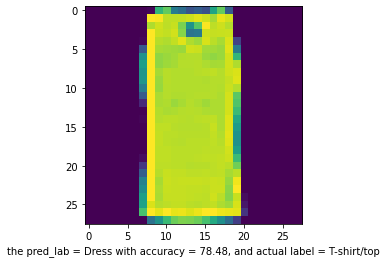

In [46]:
import random 
import matplotlib.pyplot as plt

images = test_data_norm
classes = list_of_products
true_labels = test_labels

# create a random number for a random image ploting 
rand = random.randint(0, len(images))

# create a target image
target_image = images[rand]

pred_probs = model14.predict(target_image.reshape(1, 28, 28)) # reshape it because we need only one picture

pred_label = classes[pred_probs.argmax()]
actual_label = classes[true_labels[rand]]

print(target_label, actual_label)

plt.imshow(target_image)
plt.xlabel(f"the pred_lab = {pred_label} with accuracy = {tf.reduce_max(pred_probs) * 100 :.2f}, and actual label = {actual_label}")

## Visual Evaluation Of The Model

in addition to evaluation with confusion matrix, when working with images or other form of the visual data, it is good practice to visualize the predeictions with images.

For that **let's** now create a function which will:
* randomly plot the image
* label the image with either true or false prediction

In [79]:
def plot_rand_image(model, images, true_labels, classes):
  '''
  This function will plot the image
  and will label it with predicted label and true label
  '''

  import random 
  import matplotlib.pyplot as plt

  # setting the size of the figure
  plt.figure(figsize = (5,5))
 
  # create a random number for a random image ploting 
  rand = random.randint(0, len(images))
 
  # create a target image
  target_image = images[rand]

  # check how the model is predicting in his own
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # reshape it because we need only one picture

  # let's see what our model predicts and what the actual thing is
  pred_label = classes[pred_probs.argmax()]
  actual_label = classes[true_labels[rand]]

  # print(target_label, actual_label)

  # changing the color of the image label based on its prediction
  if pred_label == actual_label:
    color = 'green'
  else:
    color = 'red'
  
  # Plot the image with its predicted and actual label
  plt.imshow(target_image, cmap=plt.cm.binary)
  plt.xlabel(f"Prediction = {pred_label} : Accuracy {tf.reduce_max(pred_probs) * 100 :.2f}, Actual = [{actual_label}]",
             color=color,
             size=18)
  # print(pred_label, actual_label)
  
  


1/1 [==============================] - 0s 106ms/step


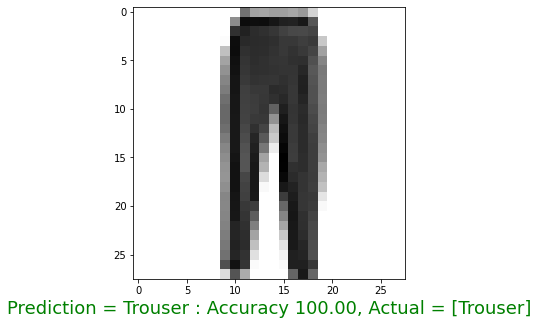

In [80]:
plot_rand_image(model=model14, images=test_data,
                true_labels=test_labels,
                classes=list_of_products)

## Patterns learned by the Model

In [81]:
# Checking the layers of our latest model
model14.layers

The above are the total four layers of our model, now in order to get a particular layer, we can index it

In [82]:
# Get the particular layer of the model
model14.layers[1]

To find the patterns learned by the model, we can use the getweights method, by the way patterns, weights, and features can be used interchangeably.

In [88]:
# Checking the weights and biases of our model
weights, biases = model14.layers[1].get_weights()

# weights and shape of the weights
weights, weights.shape

(array([[ 0.71502626, -0.06077098, -0.9976306 , -1.0484313 ],
        [ 0.2773213 , -0.47155428, -0.5291645 ,  0.0232926 ],
        [ 0.7752429 ,  0.5402763 , -1.128857  , -0.7426155 ],
        ...,
        [-0.3945344 ,  0.476287  , -0.22641571,  0.25505948],
        [-0.40515783,  0.618101  ,  0.23928401, -0.5038762 ],
        [ 0.23884569,  0.11606903, -0.12131351,  0.04352415]],
       dtype=float32), (784, 4))

This is what the internal patterns of a single layer look like....


**Weight**
* Weight represent the strength of the connection between the units.

* Specifically the weight includes four numbers for each of the data point inside the input tensor that it starts to learn and adjust to find patterns in these 784 number, these four number are responsible for making the decisions and predictions that the model makes.

* These values are completely randomly created by the model **but only at the begining** with kernel initializer variable and the form of randomness is **glorot_uniform**

* Weights near to zero means changing the input will not change the output 

* Negative weights means increasing the input will decrease the output


**Shape of wight**
* The shape of the weights come from the input tensor (which is 28 * 28 = 784)
* While the 4 in the shape of weights represents 4 hidden neurons / units.


In [91]:
# Checking out the biases and its shape ..
biases, biases.shape

(array([ 2.4485759e-02, -6.1474519e-04, -2.7230185e-01,  8.1124872e-01],
       dtype=float32), (4,))

**Weights and Biases**
* Weight is the parameter within a neural network that transforms input data within the network's hidden layers. A neural network is a series of nodes, or neurons. Within each node is a set of inputs, weight, and a bias value.

** Biases **
* For every hidden unit, there is one bias
* Biases are just like an intercept added to a linear equation.
* This additional parameter is used to adjust the output along with the weighted sum of inputs to neurons.
* It shifts the activation function to right or left

## Looking the deep learning model from other perspective or in some other way

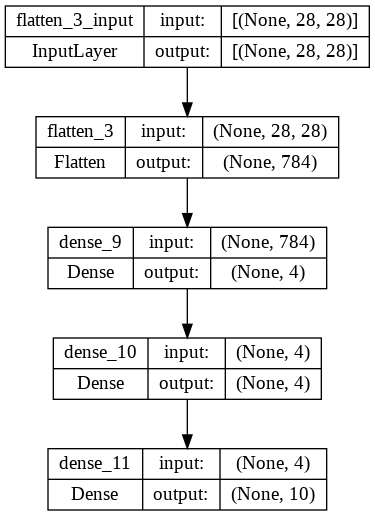

In [92]:
from tensorflow.keras.utils import plot_model

plot_model(model14, show_shapes=True)